## Cat Dog Dataset

The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

You can obtain the dataset from https://www.kaggle.com/c/dogs-vs-cats/data

This case study is adopted from https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification

### 1. Import Library

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
mypath=r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind non-github\DL practice assignments\cats_dogs"
print(os.listdir(mypath))
#print(os.listdir("../input"))

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense, BatchNormalization, Dropout


['3-Keras CNN Dog or Cat Classification_BALINT.ipynb', 'dogs-vs-cats', 'model_weights.weights.h5']


### 2. Define Constants

In [2]:
FAST_RUN = True #False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_CHANNELS=3
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)


### 3. Prepare Traning Data

In [3]:
# Add category labels to the training data
files = os.listdir(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind non-github\DL practice assignments\cats_dogs\dogs-vs-cats\train\train")
labelled_data = [{'filename': f, 'category': 0 if f.startswith('cat') else 1} for f in files]
df = pd.DataFrame(labelled_data)
df.head()


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [4]:
print(len(files))

25000


#### See Total In count

<Axes: xlabel='category', ylabel='count'>

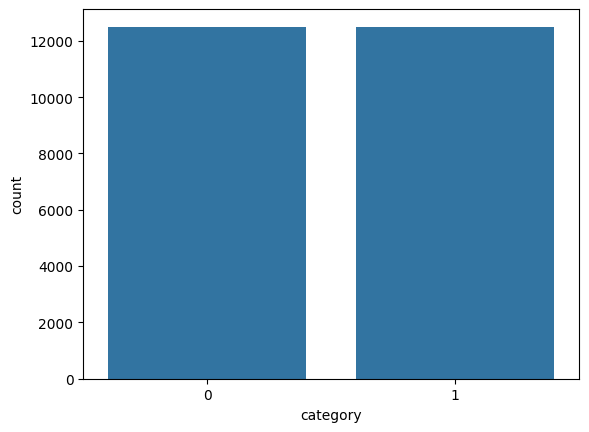

In [5]:
sns.countplot(x = 'category', data = df)

From our data we have 12000 cats and 12000 dogs

#### See sample image

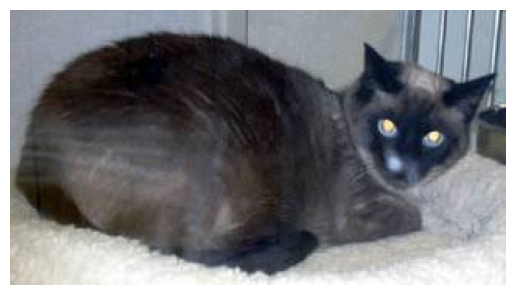

In [6]:
from PIL import Image
# Path to the directory 
image_dir = r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind non-github\DL practice assignments\cats_dogs\dogs-vs-cats\train\train"

# Get a sample image file
sample_image_file = os.listdir(image_dir)[10]  # Adjust index to select a different image

# Open and display the image
image_path = os.path.join(image_dir, sample_image_file)
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

### 4. Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single dimension array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layer reduces the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [7]:
#set a seed
seed = 1
np.random.seed(seed)
random.seed(seed)

# Initialising the CNN
model = Sequential()

In [8]:
Input_shape =(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = Input_shape, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

model.summary()

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,306 (12.61 MB)

 Trainable params: 3,305,602 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

### 5. Callbacks

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


**Early Stop**

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The `EarlyStopping` callback is configured when instantiated via arguments.

The `monitor` allows you to specify the performance measure to monitor in order to end training.

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [10]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            factor = 0.5, # reduces learning rate by 50%
                                            patience = 2,
                                            min_lr = 1e-4, #set lower bound for lr
                                            verbose = 1) # show when lr changes

### 6. Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [12]:
df['category_string'] = df['category'].map({0: 'cat', 1: 'dog'})
df.drop('category', axis = 1, inplace = True)

### 7. Traning Generator

In [13]:
# First split my training data into training data and validation data
train_df, validation_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df = train_df.reset_index(drop = True)
validation_df = validation_df.reset_index(drop =True)



In [14]:
batch_size = 15

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

### Validation Generator

In [15]:
# this is the augmentation configuration we will use for training
validation_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

### 8. See how our generator work

Seem to be nice 

In [16]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    image_dir,
    x_col='filename',
    y_col = 'category_string',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    image_dir,
    x_col='filename',
    y_col = 'category_string',
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


### 9. Fit Model

In [17]:
STEP_SIZE_TRAIN = 20000//batch_size
STEP_SIZE_VAL = 5000//batch_size

model.fit(train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          epochs = 50,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VAL,
          callbacks=[earlystop, learning_rate_reduction])

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 293s 216ms/step - accuracy: 0.6033 - loss: 0.7796 - val_accuracy: 0.6795 - val_loss: 0.6066 - learning_rate: 0.0010
Epoch 2/50
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 4:35 207ms/step - accuracy: 0.6667 - loss: 0.5290

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.6667 - loss: 0.5290 - val_accuracy: 0.6715 - val_loss: 0.6102 - learning_rate: 0.0010
Epoch 3/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.6864 - loss: 0.5822
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 289s 217ms/step - accuracy: 0.6864 - loss: 0.5822 - val_accuracy: 0.6539 - val_loss: 0.6592 - learning_rate: 0.0010
Epoch 4/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.8667 - loss: 0.4642 - val_accuracy: 0.6492 - val_loss: 0.6663 - learning_rate: 5.0000e-04
Epoch 5/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 287s 215ms/step - accuracy: 0.7497 - loss: 0.5082 - val_accuracy: 0.7774 - val_loss: 0.4617 - learning_rate: 5.0000e-04
Epoch 6/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.7333 - loss: 0.4917 - val_accuracy: 0.7738 - val_loss: 0.4687 - learning_rate: 5.0000e-04
Epoch 7/50
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 288s 216ms/step - 

### 10. Save Model

In [18]:
# model.save_weights('model_weights.weights.h5') #saves the model in HD5 format
model.load_weights('model_weights.weights.h5')


ValueError: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_1, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(128, 2), Received: value.shape=(128, 1). Target variable: <Variable path=sequential/dense_1/kernel, shape=(128, 2), dtype=float32, value=[[-6.24195300e-02 -1.21635646e-01]
 [ 2.34154418e-01  1.65353835e-01]
 [-4.35589217e-02 -1.11703299e-01]
 [ 3.79008204e-02 -6.54657856e-02]
 [ 8.50782320e-02  1.37792844e-02]
 [ 5.75135127e-02 -3.31383459e-02]
 [-7.59651326e-03 -8.67360532e-02]
 [-1.39598250e-01 -1.80537105e-01]
 [ 2.43563857e-02  8.78962204e-02]
 [-2.59830356e-02 -8.55654757e-03]
 [-9.50701386e-02 -2.51841452e-02]
 [-1.15180835e-01 -4.35768589e-02]
 [-1.19244372e-02  5.46413288e-02]
 [ 3.45579758e-02 -5.35443425e-02]
 [ 1.10720932e-01  3.83527651e-02]
 [ 9.68119800e-02  1.53266907e-01]
 [ 3.00924219e-02  9.35559645e-02]
 [-1.10131213e-02  3.89955975e-02]
 [ 3.14570181e-02  8.94005969e-02]
 [-7.18524009e-02 -9.42666754e-02]
 [-1.53300632e-02  5.93681633e-02]
 [-7.65917972e-02 -1.73906665e-02]
 [-1.46917209e-01 -8.39392692e-02]
 [ 5.91726275e-03  4.48947139e-02]
 [ 5.43133505e-02  3.83093730e-02]
 [ 1.11212634e-01  1.50616258e-01]
 [ 5.70500456e-02 -4.71647782e-03]
 [-2.59903520e-02 -1.10438280e-01]
 [-1.16589695e-01 -6.46857917e-02]
 [-8.94430950e-02 -1.65660098e-01]
 [-6.05126210e-02 -1.18216269e-01]
 [ 9.76868868e-02  2.43759272e-03]
 [-1.13353573e-01 -1.47362193e-02]
 [-1.12893559e-01 -4.61678058e-02]
 [ 5.64465858e-02  1.31576076e-01]
 [ 4.62961756e-02 -1.69496164e-02]
 [ 1.16125070e-01  4.85122465e-02]
 [ 5.47012053e-02 -1.96090173e-02]
 [-1.29978210e-01 -2.14415178e-01]
 [ 1.62989393e-01  6.47853464e-02]
 [-5.68101667e-02 -1.19111978e-01]
 [-1.94061428e-01 -1.30802840e-01]
 [ 2.65994649e-02 -4.14538607e-02]
 [ 2.29557827e-02  9.88900810e-02]
 [ 1.00320436e-01  2.59037577e-02]
 [-1.41152337e-01 -5.88943139e-02]
 [ 1.98611878e-02 -6.50373548e-02]
 [ 9.41952839e-02  2.11965628e-02]
 [-3.26343775e-02  2.03156210e-02]
 [-4.66357395e-02  1.77093130e-02]
 [-1.59626678e-01 -1.14600182e-01]
 [-7.66494051e-02 -1.54211968e-01]
 [ 5.95701747e-02 -1.13158636e-02]
 [ 7.58638382e-02  1.00831784e-01]
 [-2.15652332e-01 -1.56540871e-01]
 [-1.60921901e-01 -1.00339271e-01]
 [ 4.36581858e-02  9.98819172e-02]
 [-7.43062645e-02 -1.48324847e-01]
 [ 1.77792124e-02  6.47857115e-02]
 [ 1.94793344e-02 -7.90673122e-02]
 [-8.53588879e-02  7.31849764e-03]
 [ 3.16893384e-02  9.58843157e-02]
 [ 1.62941426e-01  1.10158935e-01]
 [ 2.80785188e-02 -4.82701920e-02]
 [ 1.42444700e-01  8.76940489e-02]
 [ 1.45448551e-01  6.01924583e-02]
 [-2.21961617e-01 -1.63439214e-01]
 [-1.24866202e-01 -3.26215364e-02]
 [ 5.68277016e-02  1.31929547e-01]
 [-3.11267972e-02 -1.25109136e-01]
 [ 1.43944353e-01  6.70559108e-02]
 [ 1.75256923e-01  8.58071670e-02]
 [-6.00900948e-02 -1.51001200e-01]
 [-2.34202016e-02 -1.08470030e-01]
 [-7.43969902e-02  1.30460532e-02]
 [ 4.49090870e-03  9.32372510e-02]
 [-1.42354876e-01 -1.14857107e-01]
 [ 2.06390217e-01  1.40797585e-01]
 [ 1.54499346e-02 -4.21187431e-02]
 [ 3.69837247e-02  1.34193599e-01]
 [ 3.34215648e-02  1.08127847e-01]
 [-4.52832058e-02  7.81877059e-03]
 [-7.88863283e-03  5.16881309e-02]
 [-5.47781251e-02  1.53312208e-02]
 [-6.93512782e-02 -1.12346718e-02]
 [-1.62924945e-01 -7.81925991e-02]
 [-6.65714443e-02  1.07797869e-02]
 [-9.44487900e-02 -1.79756567e-01]
 [-4.28735055e-02  2.32875627e-02]
 [-2.26314869e-02 -1.06702559e-01]
 [-5.22556901e-02 -1.12311877e-01]
 [ 1.20344818e-01  3.93293351e-02]
 [ 1.33989766e-01  6.19373731e-02]
 [ 2.20774934e-02 -6.97743744e-02]
 [-2.27809809e-02 -8.15138072e-02]
 [-1.47907153e-01 -6.87245652e-02]
 [ 1.50778413e-01  6.77442476e-02]
 [ 1.06565781e-01  4.75562289e-02]
 [-6.96723908e-02 -3.48127559e-02]
 [ 1.66533574e-01  1.27767757e-01]
 [ 2.72913743e-02 -6.28709644e-02]
 [ 2.68096197e-02  9.68498141e-02]
 [ 1.35946915e-01  2.02991620e-01]
 [ 7.52161071e-02  4.31274250e-03]
 [ 2.09206920e-02  9.35919657e-02]
 [ 6.90531870e-03  7.91053697e-02]
 [-3.18665174e-03  8.40591490e-02]
 [ 1.48158699e-01  6.82941452e-02]
 [ 7.03620836e-02  4.55458052e-02]
 [ 1.06815375e-01  1.85202062e-01]
 [-1.48884088e-01 -6.52189255e-02]
 [-2.19313224e-04  5.47032207e-02]
 [-1.08057857e-01 -5.44150360e-02]
 [-5.24631590e-02 -4.32973877e-02]
 [-9.09330696e-02 -2.64970157e-02]
 [ 3.41214910e-02  8.85941163e-02]
 [ 1.08524099e-01  2.39317473e-02]
 [-1.36583790e-01 -2.06234232e-01]
 [-5.41146174e-02  1.67352762e-02]
 [-6.82275072e-02 -4.24037576e-02]
 [-5.33055626e-02 -1.97389759e-02]
 [ 2.69807633e-02  8.45262185e-02]
 [ 1.23951353e-01  1.21145234e-01]
 [ 1.40607998e-01  7.07958490e-02]
 [-1.04210123e-01 -6.93953484e-02]
 [ 9.79474857e-02  1.50405362e-01]
 [-1.59328595e-01 -6.93867728e-02]
 [ 8.53907019e-02  1.54268056e-01]]>

List of objects that could not be loaded:
[<Dense name=dense_1, built=True>, <keras.src.optimizers.adam.Adam object at 0x000002D8FFB13DA0>]

### 11. Virtualize Training

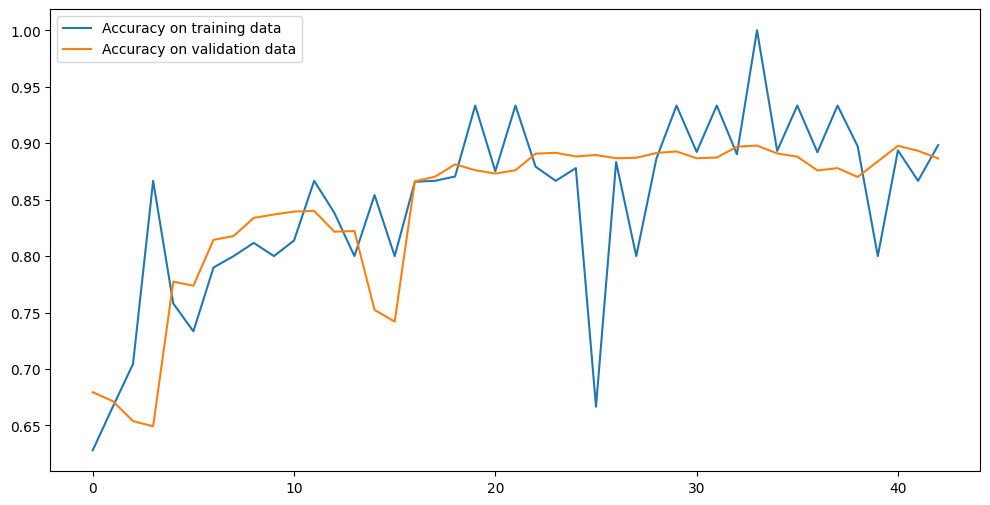

In [19]:
history = model.history.history
plt.figure(figsize= (12,6))
plt.plot(history['accuracy'], label = 'Accuracy on training data')
plt.plot(history['val_accuracy'], label = 'Accuracy on validation data')
plt.legend(loc= 'upper left')
plt.show()


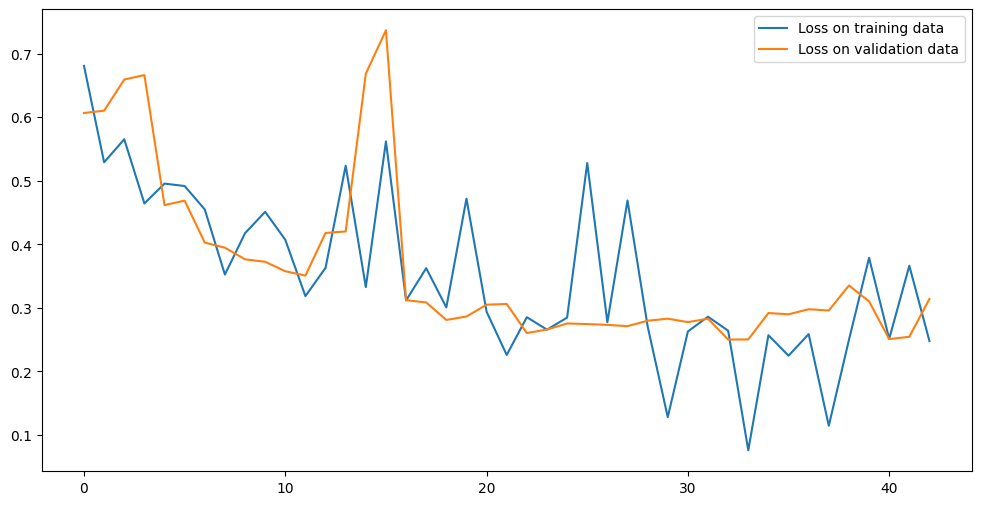

In [20]:
plt.figure(figsize= (12,6))
plt.plot(history['loss'], label = 'Loss on training data')
plt.plot(history['val_loss'], label = 'Loss on validation data')
plt.legend(loc= 'upper right')
plt.show()

### 12. Prepare Testing Data

In [21]:
test_files = os.listdir(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind non-github\DL practice assignments\cats_dogs\dogs-vs-cats\test1\test1")
df_test = pd.DataFrame(test_files)
df_test.columns = ['filename']
df_test.head(10)

,filename
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg
5,10001.jpg
6,10002.jpg
7,10003.jpg
8,10004.jpg
9,10005.jpg


### 13. Create Testing Generator

In [22]:
test_dir = r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind non-github\DL practice assignments\cats_dogs\dogs-vs-cats\test1\test1"
# test generator needs to do same preprocessing as training generator
test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=test_dir,
    x_col='filename',
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    class_mode=None,  # No labels for test set
    shuffle=False
)

Found 12500 validated image filenames.


### 14. Predict

In [24]:
test_sample_no = df_test.shape[0]
steps=np.ceil(test_sample_no/batch_size)

In [25]:
print("Model Input Shape:", model.input_shape)  # Should be (None, 128, 128, 3)
print("Model Output Shape:", model.output_shape)  # Should be (None, 1)


Model Input Shape: (None, 128, 128, 3)
Model Output Shape: (None, 2)


In [26]:
predictions = model.predict(test_generator, steps = int(steps))

c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.15294118 0.25882354 0.37647063]
   [0.15686275 0.25882354 0.4039216 ]
   [0.1254902  0.22352943 0.38431376]
   ...
   [0.2901961  0.4156863  0.80392164]
   [0.32941177 0.45882356 0.83921576]
   [0.18823531 0.33333334 0.68235296]]

  [[0.13725491 0.24313727 0.36078432]
   [0.13725491 0.2392157  0.38431376]
   [0.14509805 0.24313727 0.4039216 ]
   ...
   [0.3137255  0.40784317 0.8000001 ]
   [0.34509805 0.4431373  0.8352942 ]
   [0.20000002 0.32156864 0.6862745 ]]

  [[0.14901961 0.25490198 0.37254903]
   [0.14117648 0.24313727 0.38823533]
   [0.14117648 0.2392157  0.40000004]
   ...
   [0.3019608  0.39607847 0.7803922 ]
   [0.34117648 0.43921572 0.8352942 ]
   [0.227451   0.3372549  0.7254902 ]]

  ...

  [[0.7176471  0.7490196  0.8000001 ]
   [0.74509805 0.77647066 0.82745105]
   [0.7372549  0.76470596 0.82745105]
   ...
   [0.6431373  0.5921569  0.5686275 ]
   [0.5882353  0.5411765  0.48627454]
   [0.5647059  0.5176471  0.43137258]]

  [[0.69411767 0.70980394 0.75294125]
   [0.70980394 0.7254902  0.7725491 ]
   [0.7607844  0.7725491  0.8313726 ]
   ...
   [0.47058827 0.46274513 0.41176474]
   [0.5764706  0.5647059  0.4901961 ]
   [0.5294118  0.5058824  0.41960788]]

  [[0.6627451  0.6784314  0.68235296]
   [0.72156864 0.73333335 0.7686275 ]
   [0.73333335 0.7372549  0.8078432 ]
   ...
   [0.7686275  0.7294118  0.76470596]
   [0.65882355 0.62352943 0.6039216 ]
   [0.41176474 0.3803922  0.2901961 ]]]


 [[[0.04705883 0.03137255 0.01960784]
   [0.04705883 0.03137255 0.01960784]
   [0.04705883 0.03137255 0.01960784]
   ...
   [0.15686275 0.09411766 0.03529412]
   [0.16862746 0.10588236 0.04705883]
   [0.14509805 0.09411766 0.03137255]]

  [[0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   ...
   [0.13725491 0.07450981 0.01568628]
   [0.15686275 0.09411766 0.03529412]
   [0.14901961 0.09803922 0.03529412]]

  [[0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   ...
   [0.17254902 0.10980393 0.0509804 ]
   [0.17254902 0.10980393 0.0509804 ]
   [0.15294118 0.10196079 0.03921569]]

  ...

  [[0.33333334 0.24705884 0.29803923]
   [0.25490198 0.16862746 0.21960786]
   [0.2627451  0.1764706  0.227451  ]
   ...
   [0.32941177 0.23529413 0.29803923]
   [0.36862746 0.27450982 0.3372549 ]
   [0.38823533 0.2784314  0.3372549 ]]

  [[0.2784314  0.20784315 0.2627451 ]
   [0.24313727 0.15294118 0.19215688]
   [0.3019608  0.20000002 0.23529413]
   ...
   [0.30980393 0.21568629 0.27058825]
   [0.34117648 0.24705884 0.29803923]
   [0.3529412  0.25882354 0.3137255 ]]

  [[0.27450982 0.20392159 0.25882354]
   [0.2509804  0.16078432 0.20000002]
   [0.31764707 0.21568629 0.2509804 ]
   ...
   [0.35686275 0.2627451  0.31764707]
   [0.32941177 0.23529413 0.28627452]
   [0.3529412  0.25882354 0.3137255 ]]]


 [[[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.08235294 0.08235294 0.08235294]]

  [[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.10196079 0.10196079 0.10196079]]

  [[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.1254902  0.1254902  0.1254902 ]]

  ...

  [[0.63529414 0.7843138  0.8196079 ]
   [0.64705884 0.79215693 0.81568635]
   [0.654902   0.82745105 0.83921576]
   ...
   [0.9607844  0.9843138  0.9843138 ]
   [0.9450981  0.96470594 0.97647065]
   [0.97647065 0.97647065 0.97647065]]

  [[0.59607846 0.75294125 0.79215693]
   [0.6156863  0.7607844  0.7843138 ]
   [0.6156863  0.78823537 0.8000001 ]
   ...
   [0.97647065 0.9960785  1.        ]
   [0.9607844  0.9921569  1.        ]
   [0.98823535 0.98823535 0.98823535]]

  [[0.6        0.7568628  0.7960785 ]
   [0.6627451  0.8078432  0.8313726 ]
   [0.627451   0.8000001  0.8117648 ]
   ...
   [0.9176471  0.93725497 0.9490197 ]
   [0.96470594 0.9960785  1.        ]
   [0.9921569  0.9921569  0.9921569 ]]]


 ...


 [[[0.882353   0.909804   0.9490197 ]
   [0.85098046 0.882353   0.92549026]
   [0.8117648  0.8588236  0.9058824 ]
   ...
   [0.36862746 0.31764707 0.28627452]
   [0.26666668 0.21568629 0.18431373]
   [0.31764707 0.26666668 0.23137257]]

  [[0.91372555 0.93725497 0.9843138 ]
   [0.882353   0.91372555 0.96470594]
   [0.8078432  0.854902   0.909804  ]
   ...
   [0.42352945 0.39607847 0.3647059 ]
   [0.20784315 0.18039216 0.14901961]
   [0.2784314  0.2509804  0.21176472]]

  [[0.8980393  0.9215687  0.97647065]
   [0.89019614 0.9176471  0.9803922 ]
   [0.85098046 0.8980393  0.9607844 ]
   ...
   [0.3529412  0.33333334 0.30980393]
   [0.28627452 0.26666668 0.24313727]
   [0.32156864 0.30588236 0.27058825]]

  ...

  [[0.11764707 0.12941177 0.20392159]
   [0.6        0.6313726  0.7058824 ]
   [0.59607846 0.64705884 0.70980394]
   ...
   [0.10980393 0.2627451  0.25882354]
   [0.1137255  0.27058825 0.27058825]
   [0.15686275 0.33333334 0.3137255 ]]

  [[0.14901961 0.17254902 0.23529413]
   [0.627451   0.65882355 0.7019608 ]
   [0.56078434 0.6117647  0.64705884]
   ...
   [0.08235294 0.24313727 0.21960786]
   [0.06666667 0.24313727 0.22352943]
   [0.17254902 0.33333334 0.30980393]]

  [[0.17254902 0.19607845 0.25882354]
   [0.5882353  0.61960787 0.6627451 ]
   [0.5803922  0.6313726  0.6666667 ]
   ...
   [0.10196079 0.2627451  0.2392157 ]
   [0.0627451  0.2392157  0.21960786]
   [0.15294118 0.3137255  0.2901961 ]]]


 [[[0.69411767 0.654902   0.6156863 ]
   [0.65882355 0.61960787 0.5803922 ]
   [0.7254902  0.67058825 0.63529414]
   ...
   [0.5294118  0.5137255  0.4784314 ]
   [0.50980395 0.4901961  0.4784314 ]
   [0.49411768 0.47450984 0.46274513]]

  [[0.70980394 0.67058825 0.6313726 ]
   [0.6901961  0.6509804  0.6117647 ]
   [0.72156864 0.6666667  0.6313726 ]
   ...
   [0.5294118  0.5137255  0.4784314 ]
   [0.5058824  0.48627454 0.47058827]
   [0.5019608  0.48235297 0.4666667 ]]

  [[0.7294118  0.6901961  0.6509804 ]
   [0.6901961  0.6509804  0.6117647 ]
   [0.74509805 0.6901961  0.654902  ]
   ...
   [0.53333336 0.5176471  0.48235297]
   [0.52156866 0.5019608  0.48627454]
   [0.5019608  0.48235297 0.4666667 ]]

  ...

  [[0.9176471  0.86666673 0.8352942 ]
   [0.9333334  0.89019614 0.86666673]
   [0.9294118  0.8980393  0.8862746 ]
   ...
   [0.9607844  0.9725491  0.9921569 ]
   [0.9686275  0.9725491  0.9803922 ]
   [0.9803922  0.9843138  0.9921569 ]]

  [[0.909804   0.85098046 0.8235295 ]
   [0.9294118  0.87843144 0.854902  ]
   [0.9215687  0.882353   0.8745099 ]
   ...
   [0.96470594 0.97647065 0.9960785 ]
   [0.97647065 0.9803922  0.98823535]
   [0.97647065 0.9803922  0.98823535]]

  [[0.92549026 0.8588236  0.8313726 ]
   [0.9176471  0.8588236  0.83921576]
   [0.9058824  0.86274517 0.854902  ]
   ...
   [0.96470594 0.97647065 0.9960785 ]
   [0.9803922  0.9843138  0.9921569 ]
   [0.98823535 0.9921569  1.        ]]]


 [[[0.4039216  0.4039216  0.2627451 ]
   [0.3803922  0.39607847 0.25882354]
   [0.10980393 0.14509805 0.02352941]
   ...
   [0.30980393 0.23529413 0.00784314]
   [0.3019608  0.227451   0.        ]
   [0.3137255  0.2392157  0.01176471]]

  [[0.15686275 0.15686275 0.02352941]
   [0.2784314  0.29411766 0.15686275]
   [0.19607845 0.23529413 0.10196079]
   ...
   [0.31764707 0.24313727 0.01568628]
   [0.3137255  0.2392157  0.01176471]
   [0.30588236 0.23137257 0.00392157]]

  [[0.5529412  0.5529412  0.41960788]
   [0.24313727 0.25882354 0.12156864]
   [0.12941177 0.15686275 0.02745098]
   ...
   [0.31764707 0.24313727 0.01568628]
   [0.30980393 0.23529413 0.00784314]
   [0.30588236 0.23137257 0.00392157]]

  ...

  [[0.8941177  0.854902   0.7176471 ]
   [0.79215693 0.75294125 0.6156863 ]
   [0.7803922  0.7411765  0.6039216 ]
   ...
   [0.627451   0.58431375 0.33333334]
   [0.6392157  0.5921569  0.35686275]
   [0.6784314  0.6313726  0.4039216 ]]

  [[0.8745099  0.83921576 0.7176471 ]
   [0.82745105 0.7960785  0.654902  ]
   [0.79215693 0.7607844  0.6156863 ]
   ...
   [0.64705884 0.5882353  0.3647059 ]
   [0.6117647  0.5529412  0.32156864]
   [0.6666667  0.60784316 0.37647063]]

  [[0.83921576 0.81568635 0.6901961 ]
   [0.8470589  0.8235295  0.6901961 ]
   [0.8313726  0.8117648  0.6627451 ]
   ...
   [0.6392157  0.57254905 0.36078432]
   [0.6313726  0.5647059  0.34509805]
   [0.6431373  0.5803922  0.34901962]]]].
Traceback (most recent call last):

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1414, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'ndarray'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "c:\Users\BalintStewart\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32,), but the yielded element was [[[[0.15294118 0.25882354 0.37647063]
   [0.15686275 0.25882354 0.4039216 ]
   [0.1254902  0.22352943 0.38431376]
   ...
   [0.2901961  0.4156863  0.80392164]
   [0.32941177 0.45882356 0.83921576]
   [0.18823531 0.33333334 0.68235296]]

  [[0.13725491 0.24313727 0.36078432]
   [0.13725491 0.2392157  0.38431376]
   [0.14509805 0.24313727 0.4039216 ]
   ...
   [0.3137255  0.40784317 0.8000001 ]
   [0.34509805 0.4431373  0.8352942 ]
   [0.20000002 0.32156864 0.6862745 ]]

  [[0.14901961 0.25490198 0.37254903]
   [0.14117648 0.24313727 0.38823533]
   [0.14117648 0.2392157  0.40000004]
   ...
   [0.3019608  0.39607847 0.7803922 ]
   [0.34117648 0.43921572 0.8352942 ]
   [0.227451   0.3372549  0.7254902 ]]

  ...

  [[0.7176471  0.7490196  0.8000001 ]
   [0.74509805 0.77647066 0.82745105]
   [0.7372549  0.76470596 0.82745105]
   ...
   [0.6431373  0.5921569  0.5686275 ]
   [0.5882353  0.5411765  0.48627454]
   [0.5647059  0.5176471  0.43137258]]

  [[0.69411767 0.70980394 0.75294125]
   [0.70980394 0.7254902  0.7725491 ]
   [0.7607844  0.7725491  0.8313726 ]
   ...
   [0.47058827 0.46274513 0.41176474]
   [0.5764706  0.5647059  0.4901961 ]
   [0.5294118  0.5058824  0.41960788]]

  [[0.6627451  0.6784314  0.68235296]
   [0.72156864 0.73333335 0.7686275 ]
   [0.73333335 0.7372549  0.8078432 ]
   ...
   [0.7686275  0.7294118  0.76470596]
   [0.65882355 0.62352943 0.6039216 ]
   [0.41176474 0.3803922  0.2901961 ]]]


 [[[0.04705883 0.03137255 0.01960784]
   [0.04705883 0.03137255 0.01960784]
   [0.04705883 0.03137255 0.01960784]
   ...
   [0.15686275 0.09411766 0.03529412]
   [0.16862746 0.10588236 0.04705883]
   [0.14509805 0.09411766 0.03137255]]

  [[0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   ...
   [0.13725491 0.07450981 0.01568628]
   [0.15686275 0.09411766 0.03529412]
   [0.14901961 0.09803922 0.03529412]]

  [[0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   [0.03137255 0.03921569 0.01960784]
   ...
   [0.17254902 0.10980393 0.0509804 ]
   [0.17254902 0.10980393 0.0509804 ]
   [0.15294118 0.10196079 0.03921569]]

  ...

  [[0.33333334 0.24705884 0.29803923]
   [0.25490198 0.16862746 0.21960786]
   [0.2627451  0.1764706  0.227451  ]
   ...
   [0.32941177 0.23529413 0.29803923]
   [0.36862746 0.27450982 0.3372549 ]
   [0.38823533 0.2784314  0.3372549 ]]

  [[0.2784314  0.20784315 0.2627451 ]
   [0.24313727 0.15294118 0.19215688]
   [0.3019608  0.20000002 0.23529413]
   ...
   [0.30980393 0.21568629 0.27058825]
   [0.34117648 0.24705884 0.29803923]
   [0.3529412  0.25882354 0.3137255 ]]

  [[0.27450982 0.20392159 0.25882354]
   [0.2509804  0.16078432 0.20000002]
   [0.31764707 0.21568629 0.2509804 ]
   ...
   [0.35686275 0.2627451  0.31764707]
   [0.32941177 0.23529413 0.28627452]
   [0.3529412  0.25882354 0.3137255 ]]]


 [[[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.08235294 0.08235294 0.08235294]]

  [[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.10196079 0.10196079 0.10196079]]

  [[0.01568628 0.01568628 0.01568628]
   [0.00784314 0.00784314 0.00784314]
   [0.01176471 0.01176471 0.01176471]
   ...
   [0.03921569 0.03921569 0.03921569]
   [0.04313726 0.04313726 0.04313726]
   [0.1254902  0.1254902  0.1254902 ]]

  ...

  [[0.63529414 0.7843138  0.8196079 ]
   [0.64705884 0.79215693 0.81568635]
   [0.654902   0.82745105 0.83921576]
   ...
   [0.9607844  0.9843138  0.9843138 ]
   [0.9450981  0.96470594 0.97647065]
   [0.97647065 0.97647065 0.97647065]]

  [[0.59607846 0.75294125 0.79215693]
   [0.6156863  0.7607844  0.7843138 ]
   [0.6156863  0.78823537 0.8000001 ]
   ...
   [0.97647065 0.9960785  1.        ]
   [0.9607844  0.9921569  1.        ]
   [0.98823535 0.98823535 0.98823535]]

  [[0.6        0.7568628  0.7960785 ]
   [0.6627451  0.8078432  0.8313726 ]
   [0.627451   0.8000001  0.8117648 ]
   ...
   [0.9176471  0.93725497 0.9490197 ]
   [0.96470594 0.9960785  1.        ]
   [0.9921569  0.9921569  0.9921569 ]]]


 ...


 [[[0.882353   0.909804   0.9490197 ]
   [0.85098046 0.882353   0.92549026]
   [0.8117648  0.8588236  0.9058824 ]
   ...
   [0.36862746 0.31764707 0.28627452]
   [0.26666668 0.21568629 0.18431373]
   [0.31764707 0.26666668 0.23137257]]

  [[0.91372555 0.93725497 0.9843138 ]
   [0.882353   0.91372555 0.96470594]
   [0.8078432  0.854902   0.909804  ]
   ...
   [0.42352945 0.39607847 0.3647059 ]
   [0.20784315 0.18039216 0.14901961]
   [0.2784314  0.2509804  0.21176472]]

  [[0.8980393  0.9215687  0.97647065]
   [0.89019614 0.9176471  0.9803922 ]
   [0.85098046 0.8980393  0.9607844 ]
   ...
   [0.3529412  0.33333334 0.30980393]
   [0.28627452 0.26666668 0.24313727]
   [0.32156864 0.30588236 0.27058825]]

  ...

  [[0.11764707 0.12941177 0.20392159]
   [0.6        0.6313726  0.7058824 ]
   [0.59607846 0.64705884 0.70980394]
   ...
   [0.10980393 0.2627451  0.25882354]
   [0.1137255  0.27058825 0.27058825]
   [0.15686275 0.33333334 0.3137255 ]]

  [[0.14901961 0.17254902 0.23529413]
   [0.627451   0.65882355 0.7019608 ]
   [0.56078434 0.6117647  0.64705884]
   ...
   [0.08235294 0.24313727 0.21960786]
   [0.06666667 0.24313727 0.22352943]
   [0.17254902 0.33333334 0.30980393]]

  [[0.17254902 0.19607845 0.25882354]
   [0.5882353  0.61960787 0.6627451 ]
   [0.5803922  0.6313726  0.6666667 ]
   ...
   [0.10196079 0.2627451  0.2392157 ]
   [0.0627451  0.2392157  0.21960786]
   [0.15294118 0.3137255  0.2901961 ]]]


 [[[0.69411767 0.654902   0.6156863 ]
   [0.65882355 0.61960787 0.5803922 ]
   [0.7254902  0.67058825 0.63529414]
   ...
   [0.5294118  0.5137255  0.4784314 ]
   [0.50980395 0.4901961  0.4784314 ]
   [0.49411768 0.47450984 0.46274513]]

  [[0.70980394 0.67058825 0.6313726 ]
   [0.6901961  0.6509804  0.6117647 ]
   [0.72156864 0.6666667  0.6313726 ]
   ...
   [0.5294118  0.5137255  0.4784314 ]
   [0.5058824  0.48627454 0.47058827]
   [0.5019608  0.48235297 0.4666667 ]]

  [[0.7294118  0.6901961  0.6509804 ]
   [0.6901961  0.6509804  0.6117647 ]
   [0.74509805 0.6901961  0.654902  ]
   ...
   [0.53333336 0.5176471  0.48235297]
   [0.52156866 0.5019608  0.48627454]
   [0.5019608  0.48235297 0.4666667 ]]

  ...

  [[0.9176471  0.86666673 0.8352942 ]
   [0.9333334  0.89019614 0.86666673]
   [0.9294118  0.8980393  0.8862746 ]
   ...
   [0.9607844  0.9725491  0.9921569 ]
   [0.9686275  0.9725491  0.9803922 ]
   [0.9803922  0.9843138  0.9921569 ]]

  [[0.909804   0.85098046 0.8235295 ]
   [0.9294118  0.87843144 0.854902  ]
   [0.9215687  0.882353   0.8745099 ]
   ...
   [0.96470594 0.97647065 0.9960785 ]
   [0.97647065 0.9803922  0.98823535]
   [0.97647065 0.9803922  0.98823535]]

  [[0.92549026 0.8588236  0.8313726 ]
   [0.9176471  0.8588236  0.83921576]
   [0.9058824  0.86274517 0.854902  ]
   ...
   [0.96470594 0.97647065 0.9960785 ]
   [0.9803922  0.9843138  0.9921569 ]
   [0.98823535 0.9921569  1.        ]]]


 [[[0.4039216  0.4039216  0.2627451 ]
   [0.3803922  0.39607847 0.25882354]
   [0.10980393 0.14509805 0.02352941]
   ...
   [0.30980393 0.23529413 0.00784314]
   [0.3019608  0.227451   0.        ]
   [0.3137255  0.2392157  0.01176471]]

  [[0.15686275 0.15686275 0.02352941]
   [0.2784314  0.29411766 0.15686275]
   [0.19607845 0.23529413 0.10196079]
   ...
   [0.31764707 0.24313727 0.01568628]
   [0.3137255  0.2392157  0.01176471]
   [0.30588236 0.23137257 0.00392157]]

  [[0.5529412  0.5529412  0.41960788]
   [0.24313727 0.25882354 0.12156864]
   [0.12941177 0.15686275 0.02745098]
   ...
   [0.31764707 0.24313727 0.01568628]
   [0.30980393 0.23529413 0.00784314]
   [0.30588236 0.23137257 0.00392157]]

  ...

  [[0.8941177  0.854902   0.7176471 ]
   [0.79215693 0.75294125 0.6156863 ]
   [0.7803922  0.7411765  0.6039216 ]
   ...
   [0.627451   0.58431375 0.33333334]
   [0.6392157  0.5921569  0.35686275]
   [0.6784314  0.6313726  0.4039216 ]]

  [[0.8745099  0.83921576 0.7176471 ]
   [0.82745105 0.7960785  0.654902  ]
   [0.79215693 0.7607844  0.6156863 ]
   ...
   [0.64705884 0.5882353  0.3647059 ]
   [0.6117647  0.5529412  0.32156864]
   [0.6666667  0.60784316 0.37647063]]

  [[0.83921576 0.81568635 0.6901961 ]
   [0.8470589  0.8235295  0.6901961 ]
   [0.8313726  0.8117648  0.6627451 ]
   ...
   [0.6392157  0.57254905 0.36078432]
   [0.6313726  0.5647059  0.34509805]
   [0.6431373  0.5803922  0.34901962]]]].


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

#### Virtualize Result

### 15. See predicted result with images